# <span style = 'color:Gold'> <i> <center> FLIGHT FARE PREDICTION </center> </i> </span>
---

   <span style = 'color : blue'> * **For this particular project the Dataset is in 2 seperate files (Data_train, Train_set).**
    
    
   <span style = 'color : blue'>* **The Data Preprocessing is performed seperately for Training and Testing Dataset. This is done to avoid Data Leakage.**
       
   <span style = 'color : blue'>* **If the training and testing set were combined, during the model creating there is a chance that the model will be knowing some of the information about the test data, which might further lead to overfitting.**

## <span style = 'color:Green'> <i> TRAINING DATASET </i> </span>
---

### <span style = 'color:Purple'> <i> IMPORTING NECESSARY LIBRARIES </i> </span>
---

In [112]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set()

### <span style = 'color:Purple'> <i> IMPORTING THE TRAINING DATASET </i> </span>
---

1. The dateset is in the excel format.
   
    
   2. The pandas library has the function called "read_excel" that is used to load the data.
   
    
   3. The <span style="color: red;"> 'display.max_column' </span> is used to display all the columns in the dataset. 

In [113]:
trainData = pd.read_excel(r'Datasets/Data_Train.xlsx')

---

### <span style = 'color:Purple'> <i> EXPLORATORY DATA ANALYSIS (EDA) OF TRAINING DATASET </i> </span>
---

#### <span style = 'color:Orange'> * Head of the training dataset (Top 5 records of the dataset) </span>
---

   * The top 5 records of the training dataset

In [114]:
print(f"The top 5 records of the dataset: ")
print()

trainData.head()

The top 5 records of the dataset: 



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### <span style = 'color:Orange'> * Information about the dataset </span>
---

   * The info() function provides the basic information about the dataset like what type of data is present and so on.

In [115]:
print(f"The basic information about the dataset :")
print()

trainData.info()

The basic information about the dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### <span style = 'color:Orange'> Shape of the Training dataset </span>
---

In [116]:
print(f"Number of records and features of the dataset :")
print()

trainData.shape

Number of records and features of the dataset :



(10683, 11)

   <span style = 'color:Green'> * **The dataset contains 10683 observations(records) and 11 features.** </span>

#### <span style = 'color:Orange'> Checking for Missing / Null values in the dataset </span>
---

In [117]:
print(f"Checking for missing / null values in the dataset:")
print()

round((trainData.isnull().sum() / len(trainData) * 100), 2)

Checking for missing / null values in the dataset:



Airline            0.00
Date_of_Journey    0.00
Source             0.00
Destination        0.00
Route              0.01
Dep_Time           0.00
Arrival_Time       0.00
Duration           0.00
Total_Stops        0.01
Additional_Info    0.00
Price              0.00
dtype: float64

#### <span style = 'color:Orange'> Removing(Dropping) the missing / null values </span>
---

In [118]:
trainData.dropna(inplace=True)

##### <span style = 'color:Indigo'> Re-Check for Missing / Null values after dropping </span>
---

In [119]:
print(f"Re checking for missing variables after dropping the missing values :")
print()

round((trainData.isnull().sum() / len(trainData) * 100), 2)

Re checking for missing variables after dropping the missing values :



Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
dtype: float64

##### <span style = 'color:Indigo'> Shape of the dataset after removal of the missing / null values </span>
---

In [120]:
print(f"Shape of the dataset after the removal of the missing values :")
print()

trainData.shape

Shape of the dataset after the removal of the missing values :



(10682, 11)

---

### <span style = 'color:Purple'> <i> DATA PRE-PROCESSING OF THE TRAINING DATASET </i> </span>
---

#### <span style="color:Orange"> 1. Date_of_Journey </span>

   * The <span style="color:Red">'Date_of_Journey'</span> column is a object data type (String). 
   
   
   * It should be converted into timestamp so that the column can be used for proper prediction. 
   
   
   * The pandas's **to_datetime()** function converts the oject dtype to datetime  dtype
   
      * The **<span style="color: green;">'dt.day'** </span> is used to extract only the day from the date
      
      * The **<span style="color: green;">'dt.month'** </span> is used to extract only the month from the date

In [121]:
trainData['Day_of_Journey'] = pd.to_datetime(trainData.Date_of_Journey, format = "%d/%m/%Y").dt.day
trainData['Month_of_Journey'] = pd.to_datetime(trainData['Date_of_Journey'], format = "%d/%m/%Y").dt.month

   * Now the **Day** and **Month** has been extracted from **Date_of_Journey** column, it can be dropped.
   
   
   * The **Date_of_Journey** will be of no use for the further analysis process.

In [122]:
trainData.drop(['Date_of_Journey'], axis = 1, inplace = True)

In [123]:
trainData.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


---

#### <span style="color: Orange"> 2. Dep_Time </span>

   * **<span style="color: Gold;">Departure Time </span>** : It is the time when the plane leaves the gate
   
   
   * Similar to the 'Date_of_Journey' column, hours and mins can be extracted from the 'Dep_Time' column
   
      * The **<span style="color: Blue;">'dt.hour'** </span> is used to extract only the hours from the time
      
      * The **<span style="color: Blue;">'dt.min'** </span> is used to extract only the mins from the time     

In [124]:
trainData['Departue_Hour'] = pd.to_datetime(trainData.Dep_Time).dt.hour
trainData['Departure_Minute'] = pd.to_datetime(trainData['Dep_Time']).dt.minute

   * Now the **Hours** and **Minutes** has been extracted from **Dep_Time** column, it can be dropped.
   
   
   * The **Dep_Time** will be of no use for the further analysis process.

In [125]:
trainData.drop(['Dep_Time'], axis = 1, inplace = True)

In [126]:
trainData.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departue_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


---

#### <span style="color: Orange"> 3. Arrival_Time </span>

   * **<span style="color: Gold">Arrival Time </span>** : It is the time when the plane pulls up to the gate
   
   
   * Similar to the 'Date_of_Journey' column, hours and mins can be extracted from the 'Arrival_Time' column
   
      * The **<span style="color: Blue;">'dt.hour'** </span> is used to extract only the hours from the time
      
      * The **<span style="color: Blue;">'dt.min'** </span> is used to extract only the mins from the time     

In [127]:
trainData['Arrival_Hour'] = pd.to_datetime(trainData.Arrival_Time).dt.hour
trainData['Arrival_Minute'] = pd.to_datetime(trainData.Arrival_Time).dt.minute

   * Now the **Hours** and **Minutes** has been extracted from **Arrival_Time** column, it can be dropped.
   
   
   * The **Arrival_Time** will be of no use for the further analysis process.

In [128]:
trainData.drop(['Arrival_Time'], axis = 1, inplace = True)

In [129]:
trainData.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departue_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


---

#### <span style="color: Orange"> 4. Duration </span>

   * **<span style="color: Gold"> Duration </span>** : It is the time taken by an aircraft to travel from it **Source** and **Destination**.
   
   
   * It is the difference between **Departure Time** and **Arrival Time**
   
   
   
   * Converting the Duration column into List

In [130]:
durationTrain = list(trainData['Duration'])

for i in range(len(durationTrain)):
    
    if len(durationTrain[i].split()) != 2:                         # Check if the duration contains only hours or minutes
        
        if 'h' in durationTrain[i]:
            durationTrain[i] = durationTrain[i].strip() + " 0m"    # Appends 0 Minutes
        
        else:
            durationTrain[i] = "0h " + durationTrain[i]            # Appends 0 Hours
            

Duration_Hours = []
Duration_Minutes = []

for i in range(len(durationTrain)):
    
    Duration_Hours.append(int(durationTrain[i].split(sep = 'h')[0]))
    Duration_Minutes.append(int(durationTrain[i].split(sep = 'm')[0].split()[-1]))

   <span style = 'color:Green'> * **Add the duration_Hours and duration_Min List into train_data DataFrame.** </span>

In [131]:
trainData['Duration_Hours'] = Duration_Hours
trainData['Duration_Minutes'] = Duration_Minutes

   * Now the **Hours** and **Minutes** has been extracted from **Duration** column, it can be dropped.
   
   
   * The **Duration** will be of no use for the further analysis process.

In [132]:
trainData.drop(['Duration'], axis = 1, inplace = True)

In [133]:
trainData.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Departue_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


---

### <span style="color: Purple"> * HANDLING CATEGORICAL VALUE </span>
---

* Categorical Data is a type data that is used to group information based on characterstics.
   
   
   * Categorical Variables can be divided into two categories:
       
       1. <span style = 'color: green'> **Nominal Data** </span> : 
    * It is also know as **Named Data**, where the data has no order to it.
           
   * <span style = 'color: Blue'> **OneHotEncoding** </span> can be used inorder to handle the Nominal Data.
       
       2. <span style = 'color: green'> **Ordinal Data** </span> : It is the type of data where the data has order to it.
   
   * <span style = 'color: Blue'> **LabelEncoder** </span> can be used inorder to handle the Ordinal Data.
   

<span style = 'color: Red'> **Airline, Source, Destination, Route and Total_Stops** </span> are the Categorical Data

#### <span style="color: Orange"> 1. Airline Feature </span>
---

* <span style = 'color:Green'> **The value_counts() function returns the count of all unique values of the given index in the descending order, without any null values.** </span>

In [134]:
trainData['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

##### <span style = 'color:Indigo'> **VISUALISATION OF AIRLINE VERSUS IT'S PRICES** </span>

   * The graph shows that the Jet Airways Business class have the highest price.
   
   * Apart from the first Airline almost all are having similar median

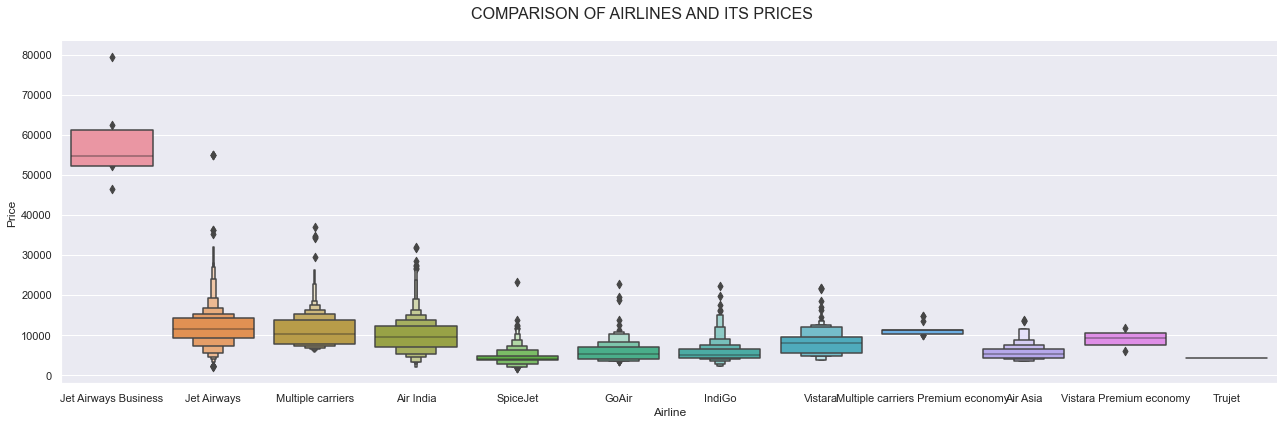

In [135]:
sns_1 = sns.catplot(y = 'Price', x = 'Airline', data = trainData.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
sns_1.fig.suptitle('COMPARISON OF AIRLINES AND ITS PRICES', fontsize = 16)
sns_1.fig.subplots_adjust(top = 0.9)

plt.show()

<span style = 'color:Green'>* **As Airline column is a Nominal type of Categorical Data, OneHotEncoding can be performed.** </span>

In [136]:
AirlineTrain = trainData[['Airline']]

AirlineTrain = pd.get_dummies(AirlineTrain, drop_first = True)

AirlineTrain.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


#### <span style="color: Orange"> 2. Source Feature </span>
---

In [137]:
trainData['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

##### <span style = 'color:Indigo'> **VISUALISATION OF SOURCE VERSUS IT'S PRICES** </span>

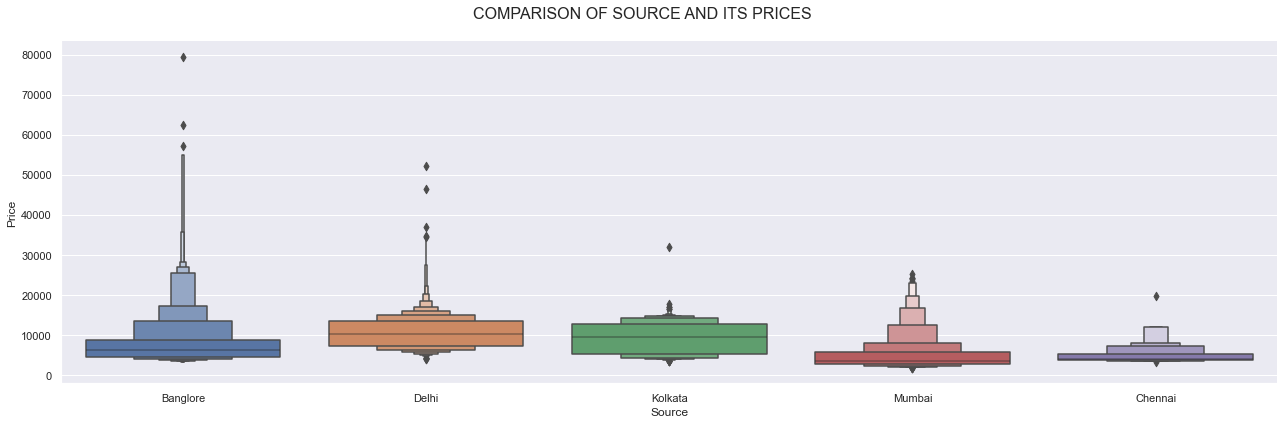

In [138]:
sns_2 = sns.catplot(y = 'Price', x = 'Source', data = trainData.sort_values('Price', ascending = False), kind = 'boxen', height = 6, aspect = 3)
sns_2.fig.suptitle('COMPARISON OF SOURCE AND ITS PRICES', fontsize = 16)
sns_2.fig.subplots_adjust(top = 0.9)

plt.show()

<span style = 'color:Green'>* **As Source column is a Nominal type of Categorical Data, OneHotEncoding can be performed.** </span>

In [139]:
SourceTrain = trainData[['Source']]

SourceTrain = pd.get_dummies(SourceTrain, drop_first = True)

SourceTrain.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


#### <span style="color: Orange"> 3. Destination Feature </span>
---

In [140]:
trainData['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<span style = 'color:Green'>* **As Destination column is a Nominal type of Categorical Data, OneHotEncoding can be performed.** </span>

In [141]:
DestinationTrain = trainData[['Destination']]

DestinationTrain = pd.get_dummies(DestinationTrain, drop_first = True)

DestinationTrain.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


#### <span style = 'color: Orange'> 4. Route and Additional_Info Feature </span>
---

   * The <span style = 'color: red'> **Additional_Info** </span> contains almost 80% as "no info". So this coloumn can be dropped.
   
   
   * The <span style = 'color: red'> **Route** </span> and <span style = 'color: red'> **Total_Stops** </span> are related. So either one of the columns can be dropped.
       In this the <span style = 'color: red'> **Route** </span> column can be dropped

In [142]:
trainData.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

#### <span style = 'color: Orange'> 5. Total Stops Feature </span>
---


In [143]:
trainData['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

   * The **Total_Stops** column is a Ordinal Categorical Data. In this case LabelEncoding can be used. 
   
   
   * The values will be assigned to the corresponding keys

In [144]:
trainData.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [145]:
trainData.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Departue_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


### <span style = 'color: Purple'> <i> * THE FINAL DATASET (DATA CONCATINATION) </i> </span>
---

   * Once the **Data Preprocessing** process in completed and the necessary information is extracted the newly extracted data can be concatinated with the <span style = 'color: green'> **train_data** </span> and a final training dataset can be created to train the machine learning model.
   
   
   * The columns <span style = 'color: red'> **(Airline, Source, Destination)** </span> can be dropped.
   
   
   
   * <span style = 'color: gold'> **Dataframes to be Concatinated : train_data + Airline + Source + Destination** </span>

In [146]:
dataTrain = pd.concat([trainData, AirlineTrain, SourceTrain, DestinationTrain], axis = 1)

In [147]:
dataTrain.head()

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Departue_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


<span style = 'color:Green'> **Dropping the Airline, Source, Desitnation Features.** </span>

In [148]:
dataTrain.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [149]:
dataTrain.head()

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Departue_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#### <span style = 'color: green'> * Shape of the Dataset After Preprocessing </span>

In [150]:
print(f"Shape of the data after pre-processing:")
print()

dataTrain.shape

Shape of the data after pre-processing:



(10682, 30)

---

## <span style = 'color:Green'> <i> TESTING DATASET </i> </span>
---

### <span style = 'color:Purple'> <i> IMPORTING THE DATASET </i> </span>
---

In [151]:
testData = pd.read_excel(r"Datasets/Test_set.xlsx")

### <span style = 'color:Purple'> <i> EXPLORATORY DATA ANALYSIS (EDA) FOR TESTING DATASET </i> </span>
---

#### <span style = 'color:Orange'> * Head of the testing dataset (Top 5 records of the dataset) </span>
---

   * The top 5 records of the testing dataset

In [152]:
print(f"The top 5 records of the dataset: ")
print()

testData.head()

The top 5 records of the dataset: 



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#### <span style = 'color:Orange'> * Information about the test dataset </span>
---

In [153]:
print(f"The basic information about the dataset :")
print()

testData.info()

The basic information about the dataset :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


#### <span style="color: Orange"> * Shape of the Testing Dataset </span>
---

In [154]:
print(f"Number of records (observations) and featrures of the testing dataset: ")
print()

testData.shape

Number of records (observations) and featrures of the testing dataset: 



(2671, 10)

#### <span style="color: Orange"> * Checking the Missing / Null values in the Dataset </span>
---

In [155]:
print(f"Checking for Missing / Null ")
print()

round(testData.isnull().sum() / len(testData) * 100, 2)

Checking for Missing / Null 



Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
dtype: float64

### <span style = 'color:Purple'> <i> DATA PRE-PROCESSING OF THE TESTING DATASET </i> </span>
---

#### <span style="color:Orange"> 1. Date_of_Journey Feature </span>

   * **Extracting the Day and Month from the Date_of_Journey column.**

In [156]:
testData['Day_of_Journey'] = pd.to_datetime(testData.Date_of_Journey, format = '%d/%m/%Y').dt.day

testData['Month_of_Journey'] = pd.to_datetime(testData['Date_of_Journey'], format = '%d/%m/%Y').dt.month

   * Once the Day and Month are extracted from the Date_of_Journey column, it can be dropped.

In [157]:
testData.drop(['Date_of_Journey'], axis = 1, inplace = True)

---

#### <span style = 'color: Orange'> 2. Dep_Time Feature </span>

   * **Extracting the Hour and Minutes from the Dep_Time column.**

In [158]:
testData['Dep_Hours'] = pd.to_datetime(testData['Dep_Time']).dt.hour

testData['Dep_Minutes'] = pd.to_datetime(testData['Dep_Time']).dt.minute

   * Once the Hours and Minutes are extracted from Dep_Time column that column can be deleted.

In [159]:
testData.drop(['Dep_Time'], axis = 1, inplace = True)

---

#### <span style = 'color: Orange'> 3. Arrival_Time Feature </span>

   * **Extracting the Hour and Minutes from the Arrival_Time column.**

In [160]:
testData['Arrival_Hours'] = pd.to_datetime(testData.Arrival_Time).dt.hour

testData['Arrival_Minutes'] = pd.to_datetime(testData.Arrival_Time).dt.minute

* Once the Hours and Minutes are extracted from Arrival_Time column that column can be deleted.

In [161]:
testData.drop(['Arrival_Time'], axis = 1, inplace = True)

---

#### <span style = 'color: Orange'> 4. Duration </span>

   * **Converting Duration column into list.**

In [162]:
durationTest = list(testData['Duration'])

for i in range(len(durationTest)):
    
    if len(durationTest[i].split()) != 2:
        
        if 'h' in durationTest[i]:
            durationTest[i] = durationTest[i].strip() + ' 0m'
        
        else:
            durationTest[i] = '0h ' + durationTest[i]

            
Duration_Hours = []
Duration_Minutes = []

for i in range(len(durationTest)):
    Duration_Hours.append(int(durationTest[i].split(sep = 'h')[0]))
    Duration_Minutes.append(int(durationTest[i].split(sep = 'm')[0].split()[-1]))    

   * Add the **duration_Hours** and **duration_Min** List into **test_data** DataFrame

In [163]:
testData['Duration_Hours'] = Duration_Hours
testData['Duration_Minutes'] = Duration_Minutes

   * Now the **Hours** and **Minutes** has been extracted from **Duration** column, it can be dropped.
   
   
   * The **Duration** will be of no use for the further analysis process.

In [164]:
testData.drop(['Duration'], axis = 1, inplace = True)

---

In [165]:
testData.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


---

### <span style="color: Purple"> * HANDLING CATEGORICAL VALUE </span>
---


#### <span style = 'color: Orange'> 1. Airline Feature <span>

In [166]:
testData['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

   * As **Airline** column is a Nominal type of Categorical Data, **OneHotEncoding** can be performed

In [167]:
AirlineTest = testData[['Airline']]

AirlineTest = pd.get_dummies(AirlineTest, drop_first = True)

In [168]:
AirlineTest.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


---

#### <span style = 'color: Orange'> 2. Source Feature <span>

In [169]:
testData['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [170]:
SourceTest = testData[['Source']]

SourceTest = pd.get_dummies(SourceTest, drop_first = True)

In [171]:
SourceTest.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


---

#### <span style = 'color: Orange'> 3. Destination Feature <span>

In [172]:
testData['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

   * As **Destination** column is a Nominal type of Categorical Data, **OneHotEncoding** can be performed

In [173]:
DestinationTest = testData[['Destination']]

DestinationTest = pd.get_dummies(DestinationTest, drop_first = True)

In [174]:
DestinationTest.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


---

#### <span style = 'color: Orange'> 4. Route and Additional_Info Features </span>


   * The <span style = 'color: red'> **Additional_Info** </span> contains almost 80% as "no info". So this coloumn can be dropped.
   
   
   * The <span style = 'color: red'> **Route** </span> and <span style = 'color: red'> **Total_Stops** </span> are related. So either one of the columns can be dropped.
       In this the <span style = 'color: red'> **Route** </span> column can be dropped

In [175]:
testData.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [176]:
testData.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50


---

#### <span style = 'color: Orange'> 5. Total_Stops Features </span>

In [177]:
testData['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

   * The **Total_Stops** column is a Ordinal Categorical Data. In this case LabelEncoding can be used. 
   
   
   * The values will be assigned to the corresponding keys

In [178]:
testData.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace = True)

In [179]:
testData.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


---

### <span style = 'color: Purple'> <i> * THE FINAL DATASET (DATA CONCATINATION) </i> </span>
---

   * <span style = 'color: Orange'> **Dataframes to be Concatinated : testData + AirlineTest + SourceTest + DestinationTest** </span>

In [180]:
dataTest = pd.concat([testData, AirlineTest, SourceTest, DestinationTest], axis = 1)

In [181]:
dataTest.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


* **The columns** <span style = 'color: red'> **(Airline, Source, Destination)** </span> **can be dropped.**

In [182]:
dataTest.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [183]:
dataTest.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hours,Dep_Minutes,Arrival_Hours,Arrival_Minutes,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### <span style = 'color: Indigo'> * Shape of the Dataset After Preprocessing </span>

In [184]:
dataTest.shape

(2671, 28)

---

## <span style = 'color: Purple'> * FEATURE SELECTION </span>
---

   <span style = 'color: gold'> **Feature Selection** </span> : 
   
   * It is the process of automatically or manually selecting the subset of most **appropriate and relevant features** that'll be used to build a model.
   
   
   * Feature selection is primarily focused on removing non-informative or redundant predictors from the model.
   
   
   * Following are some of the features selection methods:
       
   <span style = 'color: red'> * **Heatmap** </span>
   
   <span style = 'color: red'> * **feature_importance_** </span>
   
   <span style = 'color: red'> * **SelectKBest** </span>

#### <span style = 'color: Orange'> * Shape of the Training Data </span>
---

In [185]:
dataTrain.shape

(10682, 30)

#### <span style = 'color: Orange'> * Shape of the Testing Data </span>
---

In [186]:
dataTest.shape

(2671, 28)

#### <span style = 'color: Orange'> * Columns of the Training Dataset </span>
---

In [187]:
dataTrain.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Departue_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hours', 'Duration_Minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

#### <span style = 'color: Orange'> * Storing All The Independent Features of the Training Dataset </span>
---

In [188]:
X = dataTrain.loc[:, ['Total_Stops', 'Day_of_Journey', 'Month_of_Journey',
       'Departue_Hour', 'Departure_Minute', 'Arrival_Hour', 'Arrival_Minute',
       'Duration_Hours', 'Duration_Minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [189]:
X.head()

,Total_Stops,Day_of_Journey,Month_of_Journey,Departue_Hour,Departure_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [190]:
y = dataTrain.iloc[:,1 ]

y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

#### <span style = 'color: Orange'> * Correlation between Independent and Dependent Features </span>
---

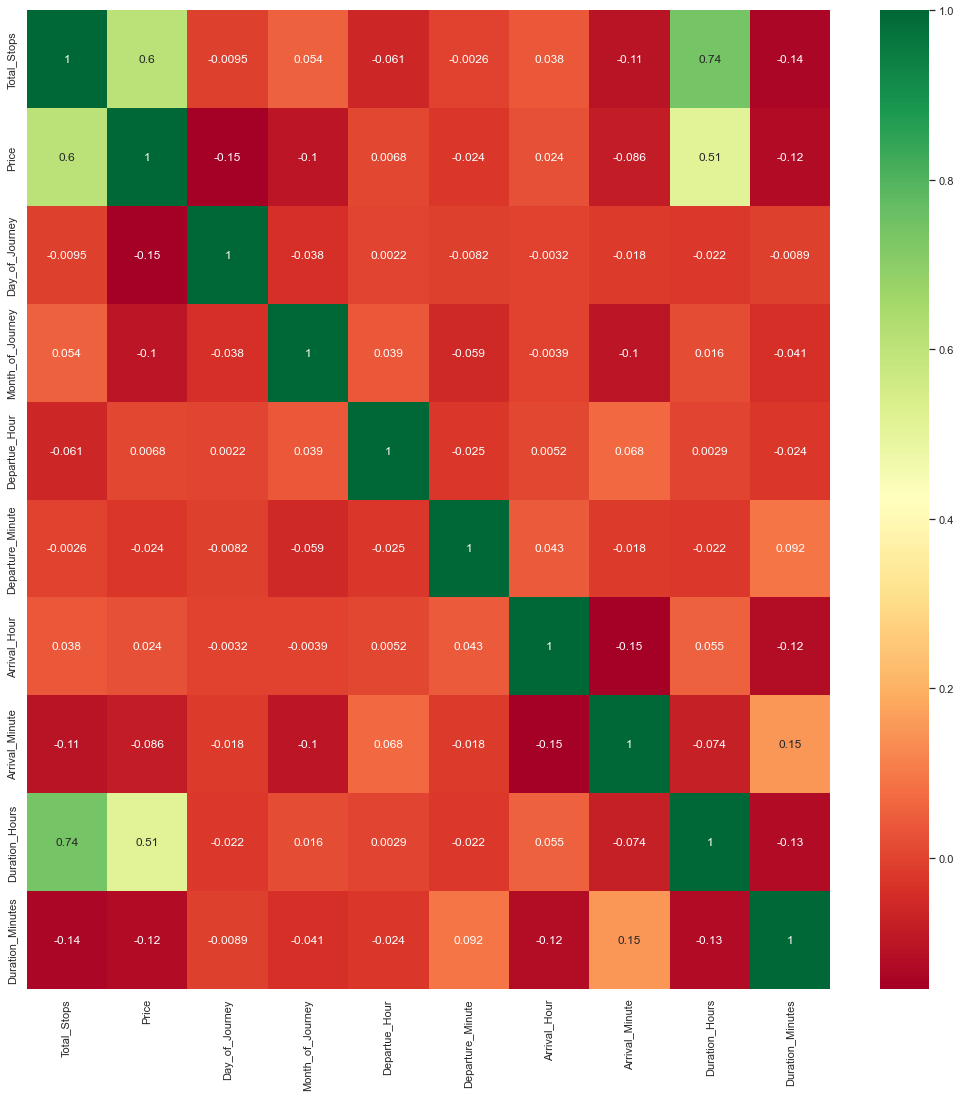

In [191]:
plt.figure(figsize = (18,18))

sns.heatmap(trainData.corr(), annot = True, cmap = 'RdYlGn')

plt.show()

---

#### <span style = 'color: Orange'> * Extracting Important Features using ExtraTreeRrgressor </span>
---

   * The extra trees regressor algorithm is like the random forests algorithm, creates many decision trees, but the sampling for each tree is random, without replacement. 
   
   
   * This creates a dataset for each tree with unique samples. A specific number of features, from the total set of features, are also selected randomly for each tree.

##### ➡️  <span style = 'color: Indigo'> Import Necessary Libraries </span>
---

In [192]:
from sklearn.ensemble import ExtraTreesRegressor

In [193]:
featureSelection = ExtraTreesRegressor()

featureSelection.fit(X,y)

ExtraTreesRegressor()

##### ➡️  <span style = 'color: Indigo'> Important Features </span>
---

In [194]:
print(featureSelection.feature_importances_)

[2.24543260e-01 1.44061387e-01 5.39889237e-02 2.49827503e-02
 2.09051669e-02 2.73900879e-02 1.90251641e-02 1.25897028e-01
 1.71474633e-02 9.53193628e-03 1.95028186e-03 1.78604978e-02
 1.37759189e-01 6.74385013e-02 1.98132803e-02 8.70076912e-04
 2.61958566e-03 1.03764352e-04 5.20271361e-03 9.11082250e-05
 4.92227451e-04 1.33211262e-02 3.25103816e-03 6.53284347e-03
 8.41640654e-03 1.42251075e-02 7.23207723e-03 4.44380862e-04
 2.49026264e-02]


##### ➡️  <span style = 'color: Indigo'> Visualisation of Important Features </span>
---

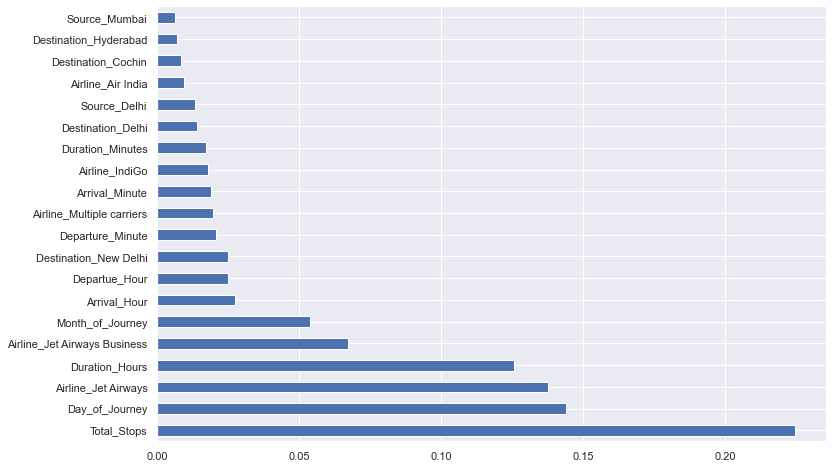

In [195]:
plt.figure(figsize = (12,8))

featureImportance = pd.Series(featureSelection.feature_importances_, index = X.columns)

featureImportance.nlargest(20).plot(kind = 'barh')

plt.show()

* From the above visualisation, <span style = 'color: green'> **Total_Stops** </span> has the highest importance followed by <span style = 'color: green'> **Day_of_Journey**, **Duration_Hours** ........ </span>

----

## <span style = 'color: Purple'> <i> * BUILDING THE MODEL </i> </span>
---

### <span style = 'color: Orange'> Fitting the Model using Random Forest </span>
---

1. Import the **train_test_split** package.


2. Split the data into train and test set in order to predict with respect to X_test.


3. Import the Random Forest Model.


4. Fit the data into the model.


5. In regression check **RSME** Score.


6. Visualise the result. 


7. Do the scaling if required => Scaling is not done in Random Forest

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [198]:
from sklearn.ensemble import RandomForestRegressor

In [199]:
reg_RF = RandomForestRegressor()
reg_RF.fit(X_train, y_train)

RandomForestRegressor()

##### ➡️ <span style = 'color:Indigo'> Prediction using the Test Set </span>
---

In [200]:
y_Prediction = reg_RF.predict(X_test)

##### ➡️ <span style = 'color:Indigo'> Score of the Training Set </span>
---

In [201]:
print(f"Score of the model using Training dataset: {round((reg_RF.score(X_train, y_train)) * 100, 2)}%")

Score of the model using Training dataset: 95.34%


##### ➡️ <span style = 'color:Indigo'> Score of the Testing Set </span>
---

In [202]:
print(f"Score of the model using the Test dataset : {round(reg_RF.score(X_test, y_test) * 100, 2)}%")

Score of the model using the Test dataset : 79.92%


##### ➡️ <span style = 'color:Indigo'> Visualisation of the Prediction </span>
---

* The Gaussian Distribution

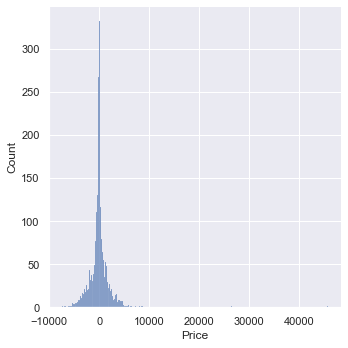

In [203]:
sns.displot(y_test - y_Prediction)
plt.show()

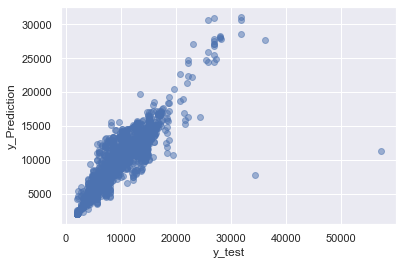

In [204]:
plt.scatter(y_test, y_Prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_Prediction")
plt.show()

In [205]:
from sklearn import metrics

In [206]:
print(f"Mean Absolute Error: {round(metrics.mean_absolute_error(y_test, y_Prediction), 2)}")
print()

print(f"Mean Squared Error: {round(metrics.mean_squared_error(y_test, y_Prediction), 2)}")
print()

print(f"Root Mean Squared Error: {round(np.sqrt(metrics.mean_squared_error(y_test, y_Prediction)), 2)}")
print()

print(f"The R2 Score : {round((metrics.r2_score(y_test, y_Prediction) * 100), 2)}")

Mean Absolute Error: 1169.94

Mean Squared Error: 4330539.72

Root Mean Squared Error: 2080.99

The R2 Score : 79.92


---

### <span style = 'color: Orange'> HYPER PARAMETER TUNNING </span>
---

* While training a machine learning model, each model and datasets needs a different set of hyperparameters which are a kind of variables.


* The only way to determine these is through multiple experiments, where you pick a set of hyperparameters and run them through your model. This is called hyperparameter tuning.


1. **RandomizedSearchCV** --> Fast
2. **GridSearchCV**

* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [207]:
from sklearn.model_selection import RandomizedSearchCV

In [208]:
# Number of Trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of Features to be considered at every split
max_features = ['auto', 'sqrt']

# Maximum number of Levels in a Tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split the nodes
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

#### <span style = 'color:Indigo'> Creating a Randon Grid </span>

In [209]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

#### <span style = 'color:Indigo'> Initialzing The Model (RandomizedSearchCV) to a variable </span>
---


* Random search of parameters, using <span style = 'color: green'> **5 fold cross validation** <span>

    
* Search across 100 different combinations

In [210]:
rf_Random = RandomizedSearchCV(estimator = reg_RF, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, verbose = 2, random_state = 42, n_jobs = 1)

#### <span style = 'color: Indigo'> * Fitting the Dataset into the Model </span>

In [211]:
rf_Random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

#### <span style = 'color: Indigo'> * Fitting the Dataset into the Model </span>

In [212]:
rf_Random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

##### ➡️ <span style = 'color:Indigo'> Prediction using the Test Set </span>
---

In [213]:
prediction = rf_Random.predict(X_test)

##### ➡️ <span style = 'color:Indigo'> Visualisation of the Prediction </span>
---

* The Gaussian Distribution

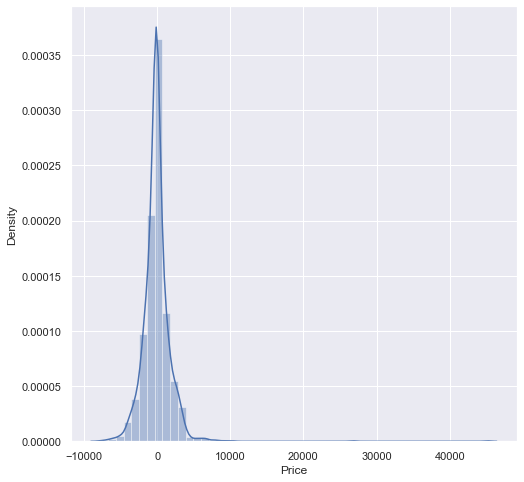

In [214]:
plt.figure(figsize=(8,8))
sns.distplot(y_test - prediction)
plt.show()

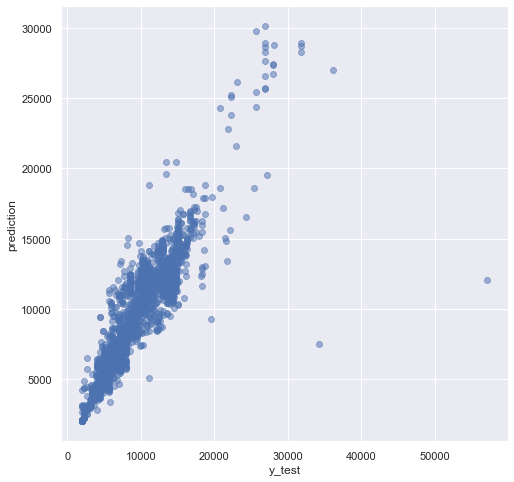

In [215]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')
plt.show()

In [216]:
print(f"Mean Absolute Error: {round(metrics.mean_absolute_error(y_test, prediction), 2)}")
print()

print(f"Mean Squared Error: {round(metrics.mean_squared_error(y_test, prediction), 2)}")
print()

print(f"Root Mean Squared Error: {round(np.sqrt(metrics.mean_squared_error(y_test, prediction)), 2)}")
print()

Mean Absolute Error: 1162.24

Mean Squared Error: 4039314.44

Root Mean Squared Error: 2009.8



---

## <span style = 'color: Purple'> <i> * PICKLE MODEL (SAVING THE MODEL FOR REUSE) </i> </span>
---

In [223]:
import pickle

### <span style = 'color : Orange'> * Open the file where you want to store the data </span>
---

In [224]:
file = open('flight_rf.pkl', 'wb')

### <span style = 'color : Orange'> * Dump the information to the file </span>
---

In [225]:
pickle.dump(reg_RF, file)

In [226]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

---

## <span style = 'color:Gold'> <i> SCORE OF THE MODEL AFTER HYPER PARAMETER TUNNING </i> </span>
---

### <span style = 'color:Purple'> * Score of the Predictive Model After Hyper Parameter Tunning </span>
---

In [221]:
y_prediction = forest.predict(X_test)

In [222]:
print(f"The score of the predictive model after Hyper Parameter Tunning : {round((metrics.r2_score(y_test, prediction) * 100), 2)}%")

The score of the predictive model after Hyper Parameter Tunning : 81.27%


---